# Class 7

## Mar. 4, 2025

_Where we left off last week_

- understand the role of empirical distributions (sample and statistic) and simulation

_New topics for today_

- Models

- Comparing two samples

- Causality


## Sampling from a Population

The law of averages also holds when the random sample is drawn from individuals in a large population.

```
 persdur            Duration - Personal activities

           VALUE  LABEL
               0  No time spent doing this activity
            9996  Valid skip
            9997  Don't know
            9998  Refusal
            9999  Not stated


 luc_rst            Population centre indicator

           VALUE  LABEL
               1  Larger urban population centres (CMA/CA)
               2  Rural areas and small population centres (non CMA/CA)
               3  Prince Edward Island
               6  Valid skip
               7  Don't know
               8  Refusal
               9  Not stated
```

In [1]:
import pandas as pd
timeuse = pd.read_csv("gss_tu2016_main_file.csv")

important_cols = ["CASEID", "persdur", "luc_rst"]

timeuse_subset = timeuse[important_cols]
print(timeuse_subset.shape)
timeuse_subset.head()

(17390, 3)


/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_4201/752036752.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CASEID,persdur,luc_rst
0,10000,30,1
1,10001,30,1
2,10002,30,1
3,10003,75,1
4,10004,15,1


Transform time spent on personal activities from minutes to hours, and add this new column called `"persdur_hour"` to `timeuse_subset`.

In [2]:
timeuse_subset = timeuse_subset.copy()
timeuse_subset["persdur_hour"] = (timeuse_subset["persdur"] / 60)
timeuse_subset.head()

,CASEID,persdur,luc_rst,persdur_hour
0,10000,30,1,0.50
1,10001,30,1,0.50
2,10002,30,1,0.50
3,10003,75,1,1.25
4,10004,15,1,0.25


Let's zoom in on respondents that had a personal activities time between 0.25 and 3 hours.

In [3]:
zoom = (timeuse_subset["persdur_hour"] >= 0.25) & (timeuse_subset["persdur_hour"] <= 3)

timeuse_subset.loc[zoom].describe()

,CASEID,persdur,luc_rst,persdur_hour
count,13004.000000,13004.000000,13004.000000,13004.000000
mean,18669.473624,55.479314,1.248693,0.924655
std,5032.139991,33.644386,0.494974,0.560740
min,10000.000000,15.000000,1.000000,0.250000
25%,14294.750000,30.000000,1.000000,0.500000
50%,18675.500000,45.000000,1.000000,0.750000
75%,23010.500000,70.000000,1.000000,1.166667
max,27389.000000,180.000000,3.000000,3.000000


## Empirical Distribution of the Sample

- Let's think of the 13,004 respondent times (hours) as a population, and draw random samples from it with replacement. 

- Below is a histogram of the distribution.

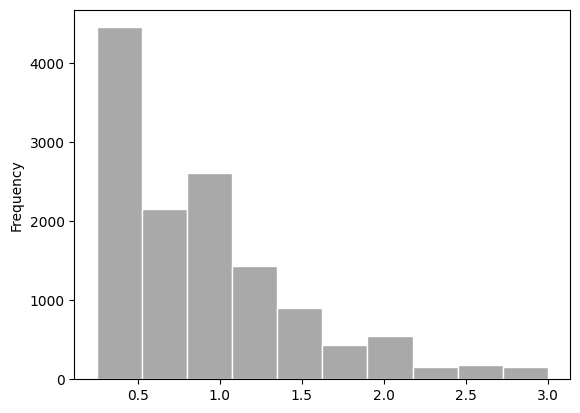

In [4]:
persdur_zoom = timeuse_subset.loc[zoom, "persdur_hour"]

persdur_zoom.plot.hist(bins=10, edgecolor="white", color="darkgrey");

A random sample of 100 ...

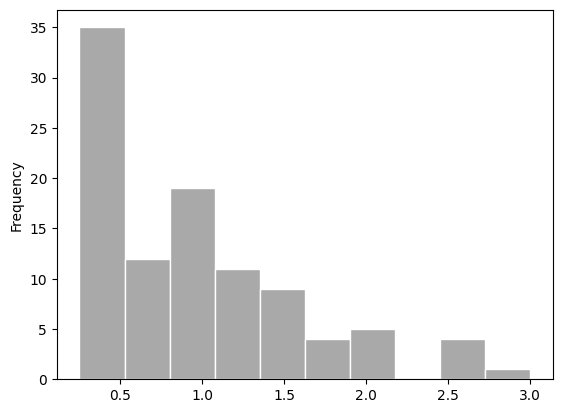

In [5]:
persdur_zoom.sample(
    100, 
    replace=True
    ).plot.hist(bins=10, edgecolor="white", color="darkgrey");

- The values that occur with the least frequency are less likely to occur in small random samples.
- As the size of the random sample increases the sample will resemble the population, with high probability.

## Interactive exploration of empirical distribution of a sample

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

def emp_hist_plot(n):
    persdur_zoom.sample(n, replace = True).plot.hist(bins=10, edgecolor="white", color="darkgrey");

interact(emp_hist_plot, n = widgets.IntSlider(min = 10, max= 500, step=50, value=10));

The histogram of the "population".

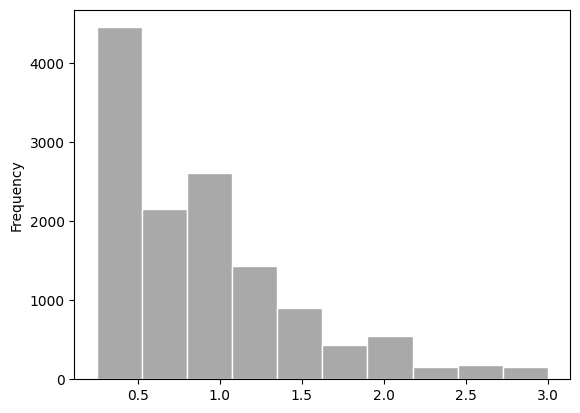

In [6]:
persdur_zoom.plot.hist(bins=10, edgecolor="white", color="darkgrey");

## Questions

- Describe how the empirical histogram changes as the the value `n` gets larger.

## Empirical Distribution of a Statistic

The Law of Averages implies that with high probability, the empirical distribution of a large random sample will resemble the distribution of the population from which the sample was drawn.

The resemblance is visible in two histograms: the empirical histogram of a large random sample is likely to resemble the histogram of the population.

## Statistical Parameter

Numerical quantities associated with a (statistical) population are called *statistical parameters* or *parameters*. For the population of respondents in `persdur_zoom`, we know the value of the parameter "median time (hours) spent on personal activities":

In [7]:
persdur_zoom.median()

0.75

More frequently, we are interested in parameters that are unknown to us.

- In a population of voters, what percent will vote for Candidate A?

- In a population of TikTok users, what is the largest number of followers for a user?

- In a population of Air Canada flights, what is the median departure delay?

- In a population of commercial air flights, what is the average [fatal accident rate](https://www.cnn.com/2025/02/19/business/airplane-crashes-statistics/index.html)?

## Statistic

For this, we will rely on data from a large random sample drawn from the population.

A *statistic* (note the singular!) is any number computed using the data in a sample. The sample median, therefore, is a statistic. 

Remember that `persdur_zoom.sample(100)` contains a random sample of 100 respondents from `persdur_zoom`. The observed value of the sample median is:

![](stats.png)

In [8]:
persdur_zoom.sample(100).median()

0.75

Our sample – one set of 100 people – gave us one observed value of the statistic. This raises an important problem of inference:

**The statistic could have been different.**

A fundamental consideration in using any statistic based on a random sample is that *the sample could have come out differently*, and therefore the statistic could have come out differently too.

Run the cell above a few times to see how the answer varies. Often it is equal to 0.75, the same value as the population parameter. But sometimes it is different.

## Example: Poll Tracker

-  Consider [the polling averages of the Canadian parties](https://newsinteractives.cbc.ca/elections/poll-tracker/canada/) as of today.

-  Each poll consists of responses from a random sample of survey participants.

-  Polls even conducted during the same period may not result in the same results.

![](korea-poll-graph-2022.png)

_Source: https://poll-mbc.co.kr/bk/2022_president.html_

## Uh oh...

- We don't know the population parameter.

- Our statistic from a random sample may be a good estimate, but it may be not because it's going to be different with a different sample.


**Just how different could the statistic have been?**   

One way to answer this is to simulate the statistic many times and note the values.  
A histogram of those values will tell us about the **distribution of the statistic**.

## Simulating a Statistic

We will simulate the sample median using the steps below.  You can replace the sample size of 1000 by any other sample size, and the sample median by any other statistic.

**Step 1: Decide which statistic to simulate.** We have already decided that: we are going to simulate the median of a random sample of size 1000 drawn from the population of time use survey respondents that had a median time spent on personal activities between 0.25 and 3.0 hours.

**Step 2: Define a function that returns one simulated value of the statistic.** Draw a random sample of size 1000 and compute the median of the sample. We did this in the code cell above. Here it is again, encapsulated in a function.

In [9]:
def random_sample_median():
    return persdur_zoom.sample(100).median()

In [10]:
random_sample_median()

0.7083333333333333

**Step 3: Decide how many simulated values to generate.** Let's do 5,000 repetitions.

**Step 4: Use a `for` loop to generate a list of simulated values.** Start by creating an empty list in which to collect our results. We will then set up a `for` loop for generating all the simulated values. The body of the loop will consist of generating one simulated value of the sample median, and appending it to our collection list.

The simulation takes a noticeable amount of time to run. That is because it is performing 5000 repetitions of the process of drawing a sample of size 1000 and computing its median. That's a lot of sampling and repeating!

Let's break down this step a bit further:

- set up an empty list called `sim_medians`.

In [12]:
sim_medians = [] # empty list

- Use the `append` function to append values to `sim_medians`.

In [13]:
sim_medians.append(random_sample_median())
sim_medians

[0.9166666666666666]

- Run the cell above several times and you will see that values keep getting appended to `sim_medians`.

- Each time the cell is run a random sample of 100 is drawn, the median is calculated then appended to the list.

In [14]:
sim_medians = []

num_sims = 5000 

for _ in range(num_sims):
    sim_medians.append(random_sample_median())

## Empirical Distribution of a Statistic

We can now examine the **empirical frequency distribution** of the median statistic.

Create a `pandas` series using the list `sim_medians` then use the `describe` function to describe the distribution.

In [15]:
pd.Series(sim_medians).describe()

count    5000.000000
mean        0.800458
std         0.081846
min         0.500000
25%         0.750000
50%         0.750000
75%         0.833333
max         1.000000
dtype: float64

- The distribution of the median can be visualized using a histogram.  

- The histogram can tell us how frequent certain values of the median occur in random samples.

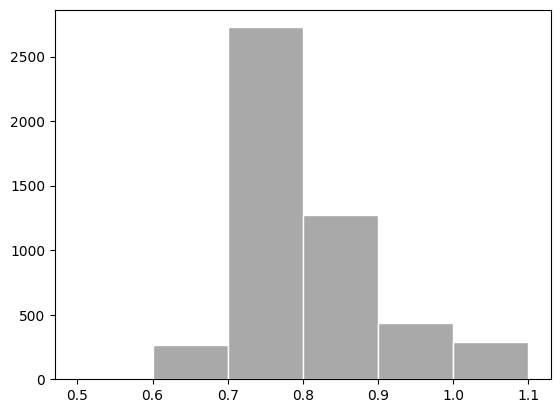

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# create bins of length 0.1 
# starting at 0.5 and ending at 1.1

median_bins = np.arange(start = 0.5, stop = 1.1, step = 0.1) # use a numpy function here

# use the bins to plot empirical distribution of medians

plt.hist(sim_medians, bins=median_bins, edgecolor="white", color="darkgrey");

The exact counts of medians in each interval can be examined using `pd.cut` and `value_counts`.

In [17]:
# create a pandas series so we can use cut function
sim_means_series = pd.Series(sim_medians)

# frequency of values in each bin
pd.cut(sim_means_series, median_bins).value_counts()

(0.7, 0.8]    2727
(0.8, 0.9]    1275
(0.9, 1.0]     437
(1.0, 1.1]     285
(0.6, 0.7]     269
(0.5, 0.6]       5
Name: count, dtype: int64

In [18]:
# relative frequency (proportion) of values in each bin
pd.cut(sim_means_series, median_bins).value_counts() / num_sims

(0.7, 0.8]    0.5454
(0.8, 0.9]    0.2550
(0.9, 1.0]    0.0874
(1.0, 1.1]    0.0570
(0.6, 0.7]    0.0538
(0.5, 0.6]    0.0010
Name: count, dtype: float64

- The histogram shows that the median values between 0.70 and 0.80 have the highest probability of occurring.

- This means that a random sample would rarely yield a median value in the range of 0.5 - 0.6 or 1.0 - 1.1.

## What can we learn from simulation?

- If we could generate all possible random samples of size 100, we would know all possible values of the statistic (the sample median), as well as the probabilities of all those values. We could visualize all the values and probabilities in the probability histogram of the statistic.

- But in many situations including this one, the number of all possible samples is large enough to exceed the capacity of the computer, and purely mathematical calculations of the probabilities can be intractably difficult --- that is, if you have access to the whole population.

- This is where empirical histograms come in.

- We know that by the Law of Averages, the empirical histogram of the statistic is likely to resemble the probability histogram of the statistic, if the sample size is large and if you repeat the random sampling process numerous times.

- This means that simulating random processes repeatedly is a way of approximating probability distributions *without figuring out the probabilities mathematically or generating all possible random samples*. 

- Thus computer simulations become a powerful tool in data science. They can help data scientists understand the properties of random quantities that would be complicated to analyze in other ways.

## Models

- A model is a set of assumptions about the data.  In many cases models include assumptions about random (stochastic) processes used to generate the data.

- Data scientists are often in a position of formulating and assessing models.

## Goals of Data Science

- Deeper understanding of the world.

- Make the world a better place to live.

- For example, help expose injustice.

- The following example demonstrates how a model can achieve such goals.

## Jury Selection

- U.S. Constitution grants equal protection under the law

- All defendants have the right to due process 

- Robert Swain, a Black man, was convicted in Talladega County, AL

- He appealed to the U.S. Supreme Court

- Main reason: Unfair jury selection in the County’s trials

- At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County. In that population, 26% of the men were Black. 

- But only eight men among the panel of 100 men (that is, 8%) were Black.

- The U.S. Supreme Court reviewed the appeal and concluded, “the overall percentage disparity has been small.” But was this assertion reasonable? 

- If jury panelists were selected at random from the county’s eligible population, there would be some chance variation. We wouldn’t get exactly 26 Black panelists on every 100-person panel. But would we expect as few as eight?

## A model of random selection

- A model of the data is that the panel was selected at random and ended up with a small number of Black panelists just due to chance.

- Since the panel was supposed to resemble the population of all eligible jurors, the model of random selection is important to assess. Let’s see if it stands up to scrutiny.

- The `numpy.random` function `multinomial(n, pvals, size)` can be used to simulate sample proportions or counts with two or more categories.

## Example 1: Rolling a six-sided die 20 times

In [19]:
import numpy as np

# number of times die is rolled
sample_size = 20

# number of experiments
num_simulations = 1

# probability of each side
true_probabilities = [1/6] * 6

# number of times each side appears
counts = np.random.multinomial(sample_size, true_probabilities, size=num_simulations)

counts

array([[3, 3, 4, 4, 5, 1]])

In [20]:
proportions = counts / sample_size

print("Sample counts: \n", counts) 
print("Sample proportions: \n", proportions)
print("True probabilities: \n", true_probabilities)

Sample counts: 
 [[3 3 4 4 5 1]]
Sample proportions: 
 [[0.15 0.15 0.2  0.2  0.25 0.05]]
True probabilities: 
 [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


## Example 2: Rolling a loaded six-side 100 times more likely to land on 6 - repeated 3 times

In [21]:
sample_size = 100

num_simulations = 3

true_probabilities = [1 / 7] * 5 + [2 / 7]

counts = np.random.multinomial(sample_size, true_probabilities, size=num_simulations)

proportions = counts / sample_size

print("Sample counts: \n", counts) 
print("Sample proportions: \n", proportions)
print("True probabilities: \n", true_probabilities)

Sample counts: 
 [[10 17  9 14 16 34]
 [12 18 10 14 13 33]
 [16 14 16 14 15 25]]
Sample proportions: 
 [[0.1  0.17 0.09 0.14 0.16 0.34]
 [0.12 0.18 0.1  0.14 0.13 0.33]
 [0.16 0.14 0.16 0.14 0.15 0.25]]
True probabilities: 
 [0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.2857142857142857]


- Let's use this to simulate the jury selection process.

- The size of the jury panel is 100, so `sample_size` is 100. 

- The distribution from which we will draw the sample is the distribution in the population of eligible jurors: 26% of them were Black, so 100% - 26% = 74% are white (very simplistic assumption, but let's go with it for now). 

- This means `true_pobabilities` is `[0.26, 0.74]`.

- One simulation is below.

In [22]:
sample_size = 100

true_probabilities = [0.26, 0.74]

num_simulations = 1

counts = np.random.multinomial(sample_size, true_probabilities, size=num_simulations)

counts

array([[23, 77]])

In [23]:
proportions = counts / sample_size

sim_counts = pd.DataFrame(proportions, columns = ["Black", "White"])

sim_counts

,Black,White
0,0.23,0.77


In [24]:
sim_counts.iloc[0,0]

0.23

## Quick side note on Indexing a `pandas` `DataFrame`

- `iloc` and `loc` are both functions that can access data in a `DataFrame`.

- `loc` uses labels to access rows and columns.

- `iloc` uses integers to access rows and columns.

In [25]:
print(sim_counts.shape)

(1, 2)


In [26]:
print(sim_counts.index)

RangeIndex(start=0, stop=1, step=1)


In [27]:
print(sim_counts.columns)

Index(['Black', 'White'], dtype='object')


In [28]:
# row 0 column 1
print(sim_counts.iloc[0, 1])

# access row 0 column 1 using label names
print(sim_counts.loc[0, "White"])

0.77
0.77


In [29]:
print(sim_counts.iloc[0, 0])

print(sim_counts.loc[0, "Black"])

0.23
0.23


## Back to simulation ... Simulate one value

- Let's write a function to simulate one value.

In [30]:
def simulate_one_count():
    sample_size = 100 # jury size

    true_probabilities = [0.26, 0.74] #true prob of race
    
    num_simulations = 1 # number of simulations
    # get the random counts
    counts = np.random.multinomial(sample_size, true_probabilities, size=num_simulations) 
    
    # store in data frame
    sim_counts = pd.DataFrame(counts, columns = ["Black", "White"])
    
    return sim_counts.iloc[0,0]


In [31]:
simulate_one_count()

29

## Simulate multiple values

-  Our analysis is focused on the variability in the counts. 

- Let’s generate 10,000 simulated values of the count and see how they vary.

- We will do this by using a for loop and collecting all the simulated counts in a list called `sim_counts`

In [32]:
sim_counts = []

number_sims = 10000

for _ in np.arange(number_sims):
    sim_counts.append(simulate_one_count())

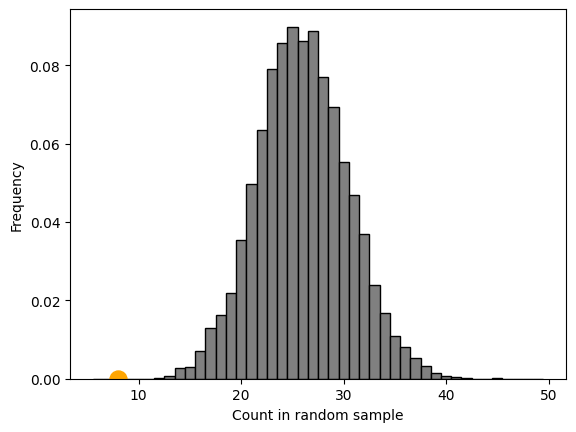

In [33]:
import matplotlib.pyplot as plt

plt.hist(sim_counts, bins = np.arange(5.5, 50, 1), edgecolor = 'black', 
         color = 'grey', density = True);
plt.xlabel('Count in random sample')
plt.ylabel('Frequency')
plt.scatter(8, 0, color = 'orange', s = 150);

## Conclusion of the data analysis

- The histogram shows that if we select a panel of size 100 at random from the eligible population, we are very unlikely to get counts of Black panelists that are as low as the eight that were observed on the panel in the trial.

- This is evidence that the model of random selection of the jurors in the panel is not consistent with the data from the panel. While it is possible that the panel could have been generated by chance, our simulation demonstrates that it is hugely unlikely.

- Therefore the most *reasonable* conclusion is that the assumption of random selection is unjustified for this jury panel.

- The simulation also could have been done using `np.random.multinomial`.

- This is an example of a 'vectorized' computation, and are usually faster than non-vectorized computations.

In [34]:
sample_size = 100

true_probabilities = [0.26, 0.74]

num_simulations = 10000

counts = np.random.multinomial(sample_size, true_probabilities, size=num_simulations)

len(counts)

10000

In [35]:
counts

array([[26, 74],
       [24, 76],
       [24, 76],
       ...,
       [34, 66],
       [22, 78],
       [27, 73]])

## Comparing two samples 

### Are mental health visit rates higher in Toronto Neighbourhoods with higher material deprivation?

> Material deprivation is closely connected to poverty and it refers to inability for individuals and communities to access and attain basic material needs. The indicators included in this dimension measure income, quality of housing, educational attainment, and family structure characteristics. 

See [2011 Ontario Marginalization Index Documentation](https://www.publichealthontario.ca/-/media/Documents/O/2017/on-marg-technical.pdf?la=en≻lang=en&hash=EED54DF437EDEDA2DFE1A00A4B14A50A) and [Toronto Health Profiles website](http://www.torontohealthprofiles.ca/index.php?varTab=HPDtbl)

## Data wrangling

- The next few slides involve reading the data into pandas and getting it ready for analysis.
- This won't be covered in detail in class, but we have already covered this process in previous classes.

- The data is stored in `1_marg_neighb_toronto_2006_OnMarg.xls` - a Microsoft Excel file format with file extension `.xls`.

- Use `pandas` function `read_excel` with `sheet_name` parameter.

### Neighbourhood deprivation scores

In [36]:
# this python library is not pre-installed
# and is required to use `pandas` `read_excel`
%pip install xlrd


[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
marg_neighb = pd.read_excel("1_marg_neighb_toronto_2006_OnMarg.xls", 
                            sheet_name="Neighbourhood_Toronto_OnMarg")
marg_neighb.head()

,Unnamed: 0,"Ontario Marginalization Index. Toronto Neighbourhoods 2006, \nQuintiles: Material Deprivation, Residential Instability, Dependency, Ethnic Concentration",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Neighb id,Neighbourhood name,POPULATION,INSTABILITY,INSTABILITY_Q,DEPRIVATION,DEPRIVATION_Q,ETHNICCONCENTRATION,ETHNICCONCENTRATION_Q,DEPENDENCY,DEPENDENCY_Q,ONMARG_COMBINED_Q
1,1,West Humber-Clairville,32252,-0.6639,1,0.162,3,2.4548,5,-0.2021,3,2.4
2,2,Mount Olive-Silverstone-Jamestown,32127,-0.1081,1,1.0195,5,3.7433,5,-0.5975,1,2.4
3,3,Thistletown-Beaumond Heights,9928,-0.3131,1,0.346,4,1.622,4,0.2845,5,2.8
4,4,Rexdale-Kipling,10725,0.1866,2,0.4704,4,1.2396,3,0.2734,5,2.8


If we specify `header` parameter then it will include column names.

In [38]:
marg_neighb = pd.read_excel("1_marg_neighb_toronto_2006_OnMarg.xls", 
                            sheet_name="Neighbourhood_Toronto_OnMarg",
                            header=1)
marg_neighb.head()

,Neighb id,Neighbourhood name,POPULATION,INSTABILITY,INSTABILITY_Q,DEPRIVATION,DEPRIVATION_Q,ETHNICCONCENTRATION,ETHNICCONCENTRATION_Q,DEPENDENCY,DEPENDENCY_Q,ONMARG_COMBINED_Q
0,1,West Humber-Clairville,32252,-0.6639,1,0.1620,3,2.4548,5,-0.2021,3,2.4
1,2,Mount Olive-Silverstone-Jamestown,32127,-0.1081,1,1.0195,5,3.7433,5,-0.5975,1,2.4
2,3,Thistletown-Beaumond Heights,9928,-0.3131,1,0.3460,4,1.6220,4,0.2845,5,2.8
3,4,Rexdale-Kipling,10725,0.1866,2,0.4704,4,1.2396,3,0.2734,5,2.8
4,5,Elms-Old Rexdale,9879,-0.0150,2,0.8040,5,1.9911,4,-0.3527,2,2.6


Get the column names of `marg_neighb`.

In [39]:
marg_neighb.columns

Index(['Neighb id ', 'Neighbourhood name ', 'POPULATION', 'INSTABILITY',
       'INSTABILITY_Q', 'DEPRIVATION', 'DEPRIVATION_Q', 'ETHNICCONCENTRATION',
       'ETHNICCONCENTRATION_Q', 'DEPENDENCY', 'DEPENDENCY_Q',
       'ONMARG_COMBINED_Q'],
      dtype='object')

Select the columns corresponding to `Neighb id ` (column 0), `Neighbourhood name ` (column 1), and `DEPRIVATION` (deprivation score - column 5).

In [40]:
marg_neighb[marg_neighb.columns[[0, 1, 5]]].head()

,Neighb id,Neighbourhood name,DEPRIVATION
0,1,West Humber-Clairville,0.1620
1,2,Mount Olive-Silverstone-Jamestown,1.0195
2,3,Thistletown-Beaumond Heights,0.3460
3,4,Rexdale-Kipling,0.4704
4,5,Elms-Old Rexdale,0.8040


Create a new `DataFrame` called `depriv` with only those columns.

In [41]:
depriv = marg_neighb[marg_neighb.columns[[0, 1, 5]]]
depriv.head()

,Neighb id,Neighbourhood name,DEPRIVATION
0,1,West Humber-Clairville,0.1620
1,2,Mount Olive-Silverstone-Jamestown,1.0195
2,3,Thistletown-Beaumond Heights,0.3460
3,4,Rexdale-Kipling,0.4704
4,5,Elms-Old Rexdale,0.8040


Rename the columns of  `depriv `

In [42]:
colnames = {"Neighb id ": "n_id",
            "DEPRIVATION" : "deprivation",
            "Neighbourhood name ": "name"}

depriv = depriv.copy()

depriv.rename(columns=colnames, inplace=True)
depriv.head()

,n_id,name,deprivation
0,1,West Humber-Clairville,0.1620
1,2,Mount Olive-Silverstone-Jamestown,1.0195
2,3,Thistletown-Beaumond Heights,0.3460
3,4,Rexdale-Kipling,0.4704
4,5,Elms-Old Rexdale,0.8040


### Mental health visit rates

- Read in data on rates of mental health visits stored in `2_ahd_neighb_db_ast_hbp_mhv_copd_2012.xls`.

- Use `read_excel` with `sheet_name` parameter

In [43]:
mentalhealth_neighb = pd.read_excel("2_ahd_neighb_db_ast_hbp_mhv_copd_2012.xls", 
                                    sheet_name = "2_MentalHealthV_2012", 
                                    header = 11)
mentalhealth_neighb.head()

,Unnamed: 0,Unnamed: 1,Male,Female,Both sexes,Male.1,Female.1,Both sexes.1,Male.2,Female.2,...,Female.12,Both sexes.12,"Rate Ratio**, Both sexes.4","H/ L/ NS, Both sexes.4","(95% CI) LL, Male.4","(95% CI) UL, Male.4","(95% CI) LL, Female.4","(95% CI) UL, Female.4","(95% CI) LL, Both sexes.4","(95% CI) UL, Both sexes.4"
0,1,West Humber-Clairville,938,1168,2106,13915,14046,27961,6.6,8.2,...,7.2,7.2,0.85,L,6.1,8.3,6.2,8.3,6.4,8.0
1,2,Mount Olive-Silverstone-Jamestown,866,1130,1996,12256,13082,25338,7.0,8.6,...,8.5,8.2,0.96,NS,6.6,9.4,7.2,10.0,7.3,9.3
2,3,Thistletown-Beaumond Heights,275,410,685,4124,4453,8577,6.4,9.2,...,8.1,7.9,0.93,NS,5.9,9.9,6.4,10.0,6.7,9.3
3,4,Rexdale-Kipling,328,453,781,4130,4470,8600,7.7,10.0,...,9.0,9.1,1.07,NS,7.2,11.6,7.3,11.0,7.8,10.6
4,5,Elms-Old Rexdale,287,396,683,3787,4028,7815,7.4,9.6,...,8.1,7.5,0.88,NS,4.8,9.2,6.2,10.5,6.1,9.1


In [44]:
mentalhealth_neighb.columns

Index(['Unnamed: 0', 'Unnamed: 1', '  Male', 'Female', 'Both sexes',
       '  Male.1', 'Female.1', 'Both sexes.1', '  Male.2', 'Female.2',
       'Both sexes.2', 'Rate Ratio**, Both sexes', 'H/ L/ NS, Both sexes',
       '(95% CI) LL, Male', '(95% CI) UL,  Male', '(95% CI) LL, Female',
       '(95% CI) UL, Female', '(95% CI) LL, Both sexes',
       '(95% CI) UL, Both sexes', '  Male.3', 'Female.3', 'Both sexes.3',
       'Rate Ratio**, Both sexes.1', 'H/ L/ NS, Both sexes.1',
       '(95% CI) LL, Male.1', '(95% CI) UL,  Male.1', '(95% CI) LL, Female.1',
       '(95% CI) UL, Female.1', '(95% CI) LL, Both sexes.1',
       '(95% CI) UL, Both sexes.1', '  Male.4', 'Female.4', 'Both sexes.4',
       '  Male.5', 'Female.5', 'Both sexes.5', '  Male.6', 'Female.6',
       'Both sexes.6', 'Rate Ratio**, Both sexes.2', 'H/ L/ NS, Both sexes.2',
       '(95% CI) LL, Male.2', '(95% CI) UL,  Male.2', '(95% CI) LL, Female.2',
       '(95% CI) UL, Female.2', '(95% CI) LL, Both sexes.2',
       '(95%

In [45]:
mh_visit_rates = mentalhealth_neighb[mentalhealth_neighb.columns[[0, 1, 10]]] # n_id, name, age-stand
mh_visit_rates.head()

,Unnamed: 0,Unnamed: 1,Both sexes.2
0,1,West Humber-Clairville,7.4
1,2,Mount Olive-Silverstone-Jamestown,7.8
2,3,Thistletown-Beaumond Heights,7.8
3,4,Rexdale-Kipling,8.9
4,5,Elms-Old Rexdale,8.5


- `Unamed: 0` corresponds to `n_id` in `depriv`

- `Unamed: 0` corresponds to `name` in `depriv`

- `Both sexes.2` (column 10) corresponds to Age-Standardized rate of Mental Health Visits (2012), All Ages 20+ for both sexes

- rename the columns of `mhvisitrates` so that identical columns in `depriv` have the same name.

In [46]:
colnames = {"Unnamed: 0": "n_id",
            "Both sexes.2" : "mh_visit_rates_mf",
            "Unnamed: 1" : "name"}

mh_visit_rates = mh_visit_rates.copy()

mh_visit_rates.rename(columns=colnames, inplace=True)

mh_visit_rates.columns

Index(['n_id', 'name', 'mh_visit_rates_mf'], dtype='object')

## Merging mental health visits and deprivation score

- Merge `mhvisitrates` and `depriv` using `merge()`.

In [47]:
mh_visit_depriv = mh_visit_rates.merge(depriv, on = ["n_id", "name"])
mh_visit_depriv.head()

,n_id,name,mh_visit_rates_mf,deprivation
0,1,West Humber-Clairville,7.4,0.1620
1,2,Mount Olive-Silverstone-Jamestown,7.8,1.0195
2,3,Thistletown-Beaumond Heights,7.8,0.3460
3,4,Rexdale-Kipling,8.9,0.4704
4,5,Elms-Old Rexdale,8.5,0.8040


## Creating a categorical variable based on a numerical variable

- We will create a variable that categorizes neighbourhoods above and below the median deprivation score.

In [48]:
median_depriv = mh_visit_depriv["deprivation"].median()
median_depriv

0.13124999999999998

In [49]:
mh_visit_depriv = mh_visit_depriv.copy()

# create a new column in mhvisitdepric called depriv_HL
# classify neighbourhoods above the median as High

mh_visit_depriv.loc[mh_visit_depriv["deprivation"] > median_depriv, "depriv_binary"] = "High"

# classify neighbourhoods at or below the median as Low
mh_visit_depriv.loc[mh_visit_depriv["deprivation"] <= median_depriv, "depriv_binary"] = "Low"

mh_visit_depriv.tail(n=5) # print last 3 rows of mhvisitdepriv

,n_id,name,mh_visit_rates_mf,deprivation,depriv_binary
131,136,West Hill,8.9,0.8138,High
132,137,Woburn,7.2,0.5257,High
133,138,Eglinton East,8.3,1.0344,High
134,139,Scarborough Village,9.2,1.3915,High
135,140,Guildwood,8.2,-0.4834,Low


## Do Neighbourhoods with high deprivation have more mental health visits compared to Neighbourhoods with low deprivation?

- We can compare the mean mental health visit rates between the two groups.

In [50]:
mean_table = mh_visit_depriv.groupby("depriv_binary")["mh_visit_rates_mf"].mean()
mean_table

depriv_binary
High    8.480882
Low     7.733824
Name: mh_visit_rates_mf, dtype: float64

In [51]:
observed_mean_difference = mean_table.iloc[0] - mean_table.iloc[1]
observed_mean_difference

0.7470588235294136

- Does the difference represent a _real_ diffrence between the two populations or did we have a peculiar group in 2012?

## The Logic of Hypothesis Testing

### 1. Hypotheses

Two claims:

1. There is no difference in the mean mental health visit rates between high and low deprivation neighbourhoods.  This is called the **null** hypothesis.

2. There is a difference in the mean mental health visit rates between high and low deprivation neighbourhoods.  This is called the **alternative** hypothesis.

### 2. Test statistic

The test statistic is a number, **calculated from the data**, that captures what we're interested in.

What would be a useful test statistic for this study?

### 3. Simulate what the null hypothesis predicts will happen

- If the null hypothesis is true then the mean values of high and low deprivation neighbourhoods will be the same regardless of how they are named or labelled.  

- That means we can randomly assign (or shuffle) the neigbourhood names to high and low deprivation and the mean difference should be close to 0.

+  Imagine we have 68 playing cards labelled `High` and 68 cards labelled `Low`.

- Shuffle the cards ...

- Assign the cards to the 136 neighbourhoods then calculate the mean difference between high and low.  This is one simulated value of the test statistic. 

- Shuffle the cards again ...

- Assign the cards to the 136 neighbourhoods then calculate the mean difference between high and low.  This is another simulated value of the test statistic. 

- Continue shuffling, assigning to neigbourhoods, and computing the mean difference.

## Shuffling

- The _observed_ difference in mean rate of mental health visits between high and low deprivation is 0.75.

- Could this difference be due to chance?

- Let's repeat this study **assuming that the difference is due to chance**.

- Suppose that the (true) mean mental health visit rates in high deprivation neigbourhoods is equal to the (true) mean mental health visit rates in low deprivation neigbourhoods. Then the **labels** of `"depriv_binary"` `High` and `Low` are ...

## Quiz

If the (true) mean mental health visit rates in high deprivation neigbourhoods is equal to the (true) mean mental health visit rates in low deprivation neigbourhoods. Then the **labels** of `"depriv_binary"` `High` and `Low` on neighbourhoods are ...

A. interchangable (`High` can be changed for `Low` without effecting the mean mental health visit rates)

B. not interchangable (Changing any lablel from `High` to `Low` affects the mean mental health visit rates)


So, if 

> (The true) mean mental health visit rates in high deprivation neigbourhoods are equal to the (true) mean mental health visit rates in low deprivation neigbourhoods

Then

> The difference in mean mental health rates between `High` and `Low` deprivation neighbourhoods after switching any two `"deperiv_binary"` labels was a possible observation.

Thus,

> Re-calculating the difference in mean mental health rates between `High` and `Low` deprivation neighbourhoods for **all possible** combinations of the **labels** will provide the distribution of the possible differences.

In [52]:
# the number of possible combinations...
import math
math.factorial(136) / (
    math.factorial(68) * math.factorial(68)
)

5.94910575592826e+39

_It will take ages (of the universe) even with the fastest supercomputer._

## Approximate via simulation

So, if 

> (The true) mean mental health visit rates in high deprivation neigbourhoods are equal to the (true) mean mental health visit rates in low deprivation neigbourhoods

Then

> The difference in mean mental health rates between `High` and `Low` deprivation neighbourhoods after switching any two `"deperiv_binary"` labels was a possible observation.

Thus,

> Re-calculating the difference in mean mental health rates between `High` and `Low` deprivation neighbourhoods for **a set of randomly shuffled labels** will provide the _approximaate_ distribution of the possible differences.


## Random shuffling

- We can randlomly shuffle using the `sample` function in `pandas`.
- The parameter `frac` in the `pandas` `sample` function refers to the fraction of rows to return.  `frac=1` means all the rows are returned.

In [53]:
mh_visit_depriv.iloc[0:10, 4]

0    High
1    High
2    High
3    High
4    High
5    High
6     Low
7    High
8     Low
9     Low
Name: depriv_binary, dtype: object

In [54]:
np.random.seed(7) # for reproducability

mh_visit_depriv.iloc[0:10, 4].sample(frac=1, replace=False)

8     Low
5    High
0    High
2    High
1    High
9     Low
7    High
3    High
6     Low
4    High
Name: depriv_binary, dtype: object

- `reset_index` resets the index.  
- the argument `drop=True` in `reset_index` indicates not to save the index after running `sample` as a column.

In [55]:
np.random.seed(7)

mh_visit_depriv.iloc[0:10,4].sample(frac=1, replace=False).reset_index(drop=True)

0     Low
1    High
2    High
3    High
4    High
5     Low
6    High
7    High
8     Low
9    High
Name: depriv_binary, dtype: object

We can investigate what happens if the labels for `High` and `Low` are randomly shuffled for the first 10 rows. 

In [56]:
# mental health visit rates for first 10 rows

visits = mh_visit_depriv.loc[0:10, "mh_visit_rates_mf"]

# randomly shuffle depriv_HL 
# previous index is dropped because we don't need it

shuffled_depriv = mh_visit_depriv.loc[0:10, "depriv_binary"].sample(
    frac=1, replace=False).reset_index(drop=True)

# put two dataframes in a list as input to
# pd.concat

L = [visits, shuffled_depriv]

# combine two columns
pd.concat(L, axis = 1)


,mh_visit_rates_mf,depriv_binary
0,7.4,High
1,7.8,High
2,7.8,High
3,8.9,High
4,8.5,Low
5,7.6,High
6,7.8,High
7,8.9,Low
8,8.2,High
9,8.0,Low


## Set up the simulation in python

**Step 1:** Shuffle the column `"depriv_binary"`

- To do this we will use `pandas` `sample` with the following parameters for the sample function:

  + `frac=1` (sample 100% of values)
  + `replace=True` (we want the same number of `High` `Low` as original sample)
  
- `reset_index(drop=True)` (use the dafault index - row labels in `pandas` so that we can assign shuffled labels to )

In [57]:
depriv_binary_shuffle = mh_visit_depriv["depriv_binary"].sample(
    frac=1, replace=False).reset_index(drop=True)

**Step 2:** Assign the shuffled labels to the neighbourhoods and compute the mean rate of mental health visits

In [58]:
visit_rate_low_shuffle = mh_visit_depriv.loc[depriv_binary_shuffle == "High", "mh_visit_rates_mf"].mean()
visit_rate_high_shuffle = mh_visit_depriv.loc[depriv_binary_shuffle == "Low", "mh_visit_rates_mf"].mean()

**Step 3:** Compute the mean difference between the groups

In [59]:
visit_rate_high_shuffle - visit_rate_low_shuffle 

-0.08823529411764675

- Steps 1 - 3 is an algorithm for computing one simulated value of the mean difference when the null hypothesis is true.

- Let's create a function to do Steps 1 - 3 that returns a simulated value of the mean difference (a simulated value of the test statistic).

In [60]:
def random_shuffle_mean():
    # step 1
    depriv_binary_shuffle = mh_visit_depriv["depriv_binary"].sample(
        frac=1, replace=False).reset_index(drop=True)
    
    #step 2
    visit_rate_low_shuffle = mh_visit_depriv.loc[
        depriv_binary_shuffle == "High", "mh_visit_rates_mf"].mean()
    visit_rate_high_shuffle = mh_visit_depriv.loc[
        depriv_binary_shuffle == "Low", "mh_visit_rates_mf"].mean()
    
    #step 3
    shuffled_diff = visit_rate_high_shuffle - visit_rate_low_shuffle 
    
    return shuffled_diff    

In [61]:
random_shuffle_mean()

-0.00588235294117645

## Distribution of simulated values of the mean difference assuming the null hypothesis is true

- Statistical tests based on shuffles or permutations of the data are called permutation tests. 

In [62]:
shuffled_diffs = []

for _ in range(5000):
    shuffled_diffs.append(random_shuffle_mean())

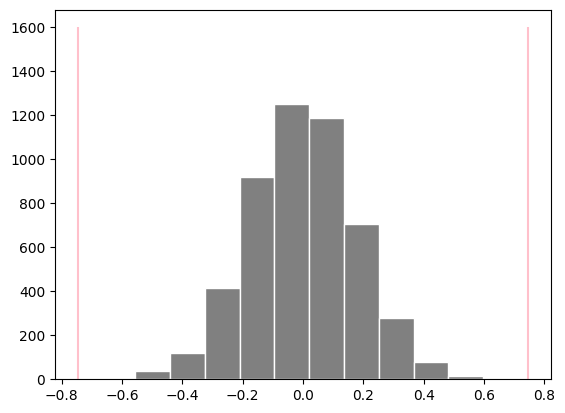

In [63]:
import matplotlib.pyplot as plt

plt.hist(shuffled_diffs, color="grey", edgecolor="white")

plt.vlines(x=observed_mean_difference, ymin=0, ymax=1600, color="pink")

plt.vlines(x=-1 * observed_mean_difference, ymin=0, ymax=1600, color="pink");

## p-value

- Assuming that the null hypothesis is true, the p-value gives a measure of the probability of getting data that are *at least* as unusual or extreme as the sample data.

- What does "at least as unusual" mean?

- An unusual value would be a mean difference (`High` minus `Low`) greater than what we observed or a mean difference (`Low` minus `High`) less than what we observed.

- Values that are larger than the observed value mean difference (the test statistic) 0.75 (`High` minus `Low`) or smaller than - 0.75 (`Low` minus `High`).

The number of simulated mean differences that are greater than the observed mean difference can be computed using:

In [64]:
right_extreme = shuffled_diffs >= observed_mean_difference

right_extreme.sum()

0

The number of simulated mean differences that are less than the -1 times observed mean difference can be computed using:

In [65]:
left_extreme = shuffled_diffs <= -1 * observed_mean_difference

left_extreme.sum()

0

The proportion of simulations that are unusual or extreme are:

In [66]:
(right_extreme.sum() + left_extreme.sum()) / 5000

0.0

We can also write a function to carry out this computation.

In [67]:
def pvalue_two_sided(shuff_diffs, obs_diffs):
    
    right_extreme_count = (shuff_diffs >= obs_diffs).sum()
    
    left_extreme_count = (shuff_diffs < -1 * obs_diffs).sum()
    
    all_extreme = right_extreme_count + left_extreme_count
    
    pval = all_extreme / len(shuff_diffs)
    
    return pval  

In [68]:
pvalue_two_sided(shuff_diffs=shuffled_diffs, obs_diffs=observed_mean_difference)

0.0

- This is called the **P-value**.  

- The entire procedure is often referred to as **significance testing**.

- None of the permuted 5000 samples resulted in a mean difference more extreme than what we observed.

## Conclusions

So, there are two possibilities:

1. The null hypothesis of no difference is true, but we have observed a **very rare** value of the mean difference in our study.

2. The null hypothesis is **false**, and there is a difference between high and low deprivation.

It's scientific convention to assume that a small p-value is evidence in favour of 2  
(i.e., the null hypothesis is false, and there is evidence of a difference in the means).

## History of Significance Testing

R.A. Fisher made fundamental contributions to statistics including developing significance testing.

> "_He was from an early age a supporter of certain eugenic ideas, and it is for this reason that he has been accused of being a racist and an advocate of forced sterilisation (Evans 2020). His promotion of eugenics has recently caused various organisations to remove his name from awards and dedications of buildings._" ([Bodmer et al, 2021](https://www.nature.com/articles/s41437-020-00394-6))

## Causality

Imagine...

<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>You have a headache.</li>
</ul>
</div>
<div class="col-sm-5"><img src="headache.svg" />
</div>



<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>You take an Aspirin at 10:00 to relieve your pain.</li>
<li>Your pain goes away after <strong>30 minutes</strong>.</li>
</ul>
</div>
<div class="col-sm-5"><img src="pill.svg" />
</div>



<div class="grid-row">
<div class="col-sm-7">
<ul>
<li>Now, you go back in time to 10:00 and you don't take an Aspirin.</li>
<li>Your pain goes away after 48 minutes.</li>
</ul>
</div>
<div class="col-sm-5"><img src="clock.svg" />
</div>



The **causal effect** of taking an Aspirin is 18 minutes (48 minutes - 30 minutes).


![](causal.jpeg)

## Potential outcomes and randomized control trials

- Establishing causality involves comparing these **potential outcomes**.  

- The problem is that we can never observe both taking an Aspirin and not taking as Aspirin (in the same person at the same time under the same conditions).

- A close approximation to comparing potential outcomes is to compare two groups of people that are similar on average (age, sex, income, etc.) except one group is allowed to take Aspirin after a headache and the other group takes a fake Aspirin (sugar pill/placebo) after a headache.  This is an example of a randomized control trial.

- Then the mean difference between time to pain relief should be due to Aspirin and not other factors related to why people may or may not take an Aspirin.  

## Does Material Deprivation Cause increases in mental health visits?

- Neighbourhoods can't be randomly assigned to high or low deprivationdepravity, like people could be randomized to take a real or fake Aspirin.

- There could be many other factors related to why a neighbourhood has a low or high deprivation score.  

- This means that when we are comparing neighbourhoods with low deprivation to high deprivation the differences in a certain outcome such as mental health visit rates could be due to factors other than deprivation such as environmental factors that are associated with mental illness, but happen to be more or less prevalent in one of the deprivation groups.



## Just in case you have seen a two-sample t-test ...

This is similar to a two-sample t-test (we won't cover in this course except here) except not as flexible.  

In [69]:
from scipy import stats

mh_visits_low = mh_visit_depriv.loc[
    mh_visit_depriv["depriv_binary"] == "Low", "mh_visit_rates_mf"]

mh_visits_high = mh_visit_depriv.loc[
    mh_visit_depriv["depriv_binary"] == "High", "mh_visit_rates_mf"]

statistic, pvalue = stats.ttest_ind(mh_visits_high, mh_visits_low)

print("The p-value from the two-sample t-test is: ", round(pvalue, 3))

The p-value from the two-sample t-test is:  0.0


The two-sample t-test involves: 

1. Computing $t_{\text observed} = \frac{\bar{x_{\text Low}} - \bar{x_{\text High}}}{SD}$, where $SD$ is an estimate of the standard deviation of the mean difference.

2. Computing the p-value using $t_{\text observed}$ and the appropriate $t$-distribution.

3. Assessing several statistical assumptions about the data to ensure the accuracy of the p-value.


## Review of this class

- Comparing two samples by simulating the distribution of a test statistic (e.g., the difference in two means) assuming the null hypothesis is true (i.e., there is no difference in the means) performs a statistical test:

  
  1. Stated the null and alternative hypotheses;
  
  2. imulated the test statistic assuming the null hypotheis by:
    
    + Randomly shuffling the group labels (e.g., high/low deprivation);
    
    + Calculating the test statistic in the shuffled data se; and
    
    + Repeating the previous two steps a large number of times (e.g., 5,000).
    
  3. Computed the p-value as a measure of how consistent the data are with the null hypothesis.  

    + The p-value is computed by summing the number of simulated values that are more extreme in the positive or negative direction.



- If the p-value is small then the data are inconsistent with the null hypothesis and there is evidence in support of the alternative hypothesis.

- A large p-value isn't an indication of evidence in support of the null hypothesis. The procedure only tests whether you have data inconsistent with the null hypothesis.

- A small p-value may not be **causal** evidence that for the alternative hypothesis unless random assignment was used part of the study design.